In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import re
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Note
# I remove value less or equal to 0 or greater than 10
# I don't think "last_z_value" in KA_HD_WIN_xx" is the correct sholaing value, So I exclude them in the following calculation
#  I replace 0 to very small value (10e-31) becasue 0 should not be included in calculating Jensen-Shannon Divergence

# Preprocess

### Combine all the data

In [2]:
import os
import glob

# use glob to get all the csv files
# in the folder
path = os.getcwd() + '/data/CELRH/avg/'
print(path)
csv_files = glob.glob(os.path.join(path, "*.csv"))

/home/cma16/shoaling/data/CELRH/avg/


In [3]:
len(csv_files)
# there are 42 qualified files in total

42

### put data points to hist bins

In [4]:

def locate_data_to_hist(data_points):
    bin_width = 0.1
    num_bins = 100
    return np.histogram(
    data_points,
    bins=num_bins,
    range=(0, 10),
    density=True)

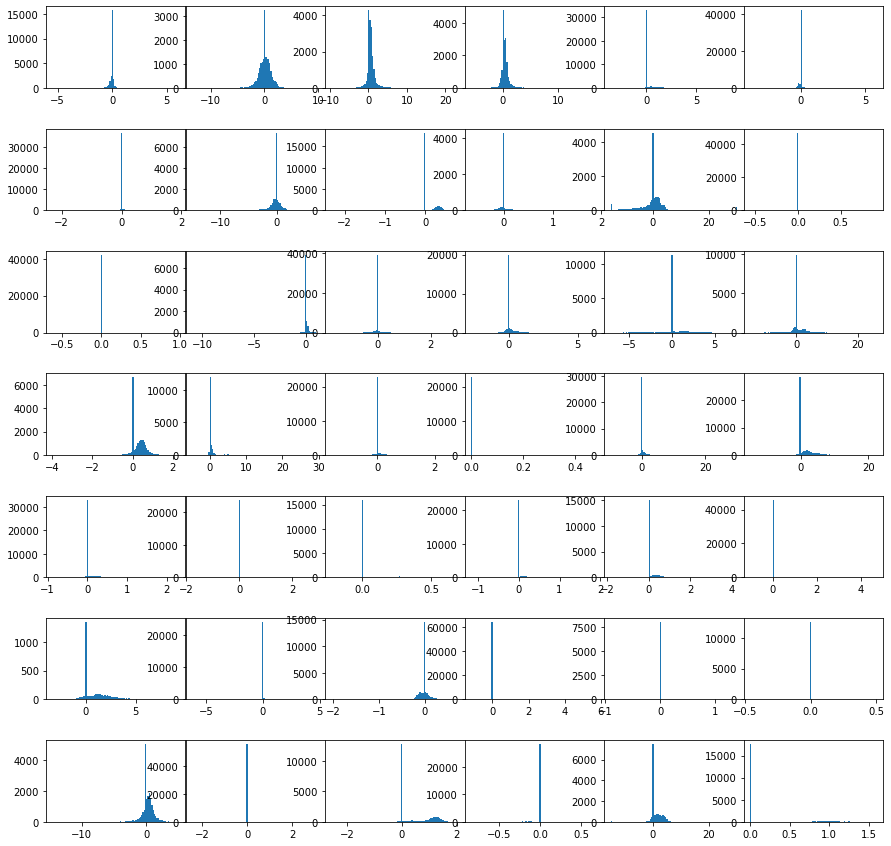

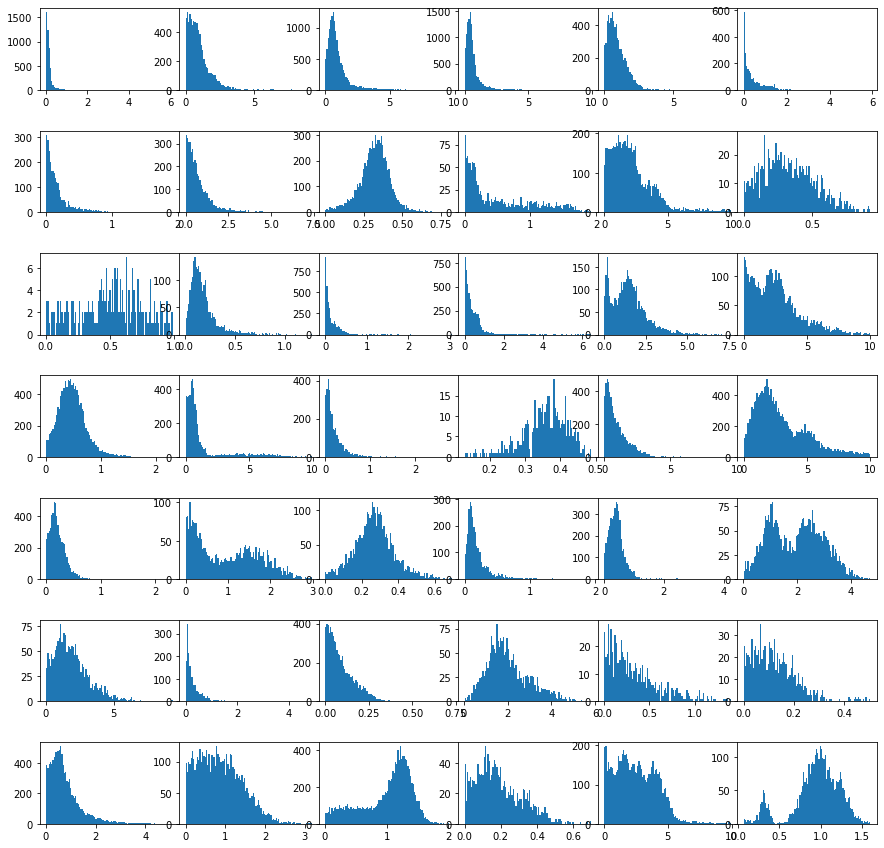

In [5]:
fig1, axs1 = plt.subplots(7,6, figsize=(15, 15), facecolor='w', edgecolor='k')
fig1.subplots_adjust(hspace = .5, wspace=.001)
axs1 = axs1.ravel()

fig2, axs2 = plt.subplots(7,6, figsize=(15, 15), facecolor='w', edgecolor='k')
fig2.subplots_adjust(hspace = .5, wspace=.001)
axs2 = axs2.ravel()

data_df = pd.DataFrame()

# loop over the list of csv files
for i, f in enumerate(csv_files):
    # read the csv file
    one_df = pd.read_csv(f)

    # print(f, one_df.columns)

    # with 0 and negative value
    axs1[i - 1].hist(one_df['AvgRate_ftPerYr_Unfiltered'], bins = 100)
    # without 0 and negative value
    pro_data = one_df[(one_df['AvgRate_ftPerYr_Unfiltered'] > 0) & (one_df['AvgRate_ftPerYr_Unfiltered'] <10)]['AvgRate_ftPerYr_Unfiltered']
    axs2[i - 1].hist(pro_data, bins = 100)
    
    hist, edges = locate_data_to_hist(pro_data)
    subreach_name = re.split('/|_avg_max_min.csv', f)[-2]

    data_df[subreach_name] = hist
    # df_BS_GRO = df_BS_GRO.append(one_df)


In [6]:
# replace 0 with very small values
data_df.replace(0, 10e-31, inplace = True)
data_df

,OH_HD_CAM_81,OH_HD_BEL_2,BS_HD_GRO_6,BS_HD_GRO_2,BS_HD_GRO_5,OH_HD_GRO_1,OH_HD_RCB_2,OH_HD_CAM_3,BS_HD_GRO_4,KA_HD_RCB_29,...,OH_HD_GRO_2,OH_HD_BEL_38,OH_HD_CAM_86,OH_HD_CAM_82,OH_HD_BEL_39,BS_HD_GRO_3,OH_HD_CAM_85,OH_HD_CAM_80,KA_HD_MAR_5,BS_HD_GRO_9
0,3.321340e-02,5.042771e+00,6.630977e-01,3.649374e-01,6.972024e-01,4.434494e-01,3.326446e+00,4.558824e+00,1.079068e+00,2.873005e-01,...,3.106283e+00,6.356068e+00,1.880583e-02,2.203390e+00,4.531915e+00,7.098466e-01,5.534779e-01,2.609274e-01,2.655758e+00,2.629450e-01
1,7.196236e-02,3.071145e+00,7.068986e-01,4.751342e-01,9.381343e-01,4.968944e-01,1.276860e+00,2.595588e+00,1.018986e+00,7.841777e-01,...,2.190252e+00,2.576311e+00,2.820874e-02,1.895223e+00,3.840426e+00,7.632550e-01,6.357517e-01,3.257437e-01,3.423537e+00,2.656419e-01
2,3.016883e-01,9.242646e-01,6.059131e-01,6.261181e-01,1.127879e+00,6.586740e-01,9.958678e-01,1.084559e+00,1.004566e+00,2.714781e+00,...,1.285966e+00,9.332554e-01,3.761166e-02,1.587057e+00,1.265957e+00,7.690814e-01,5.553478e-01,3.506731e-01,1.875393e+00,1.833873e-01
3,5.729311e-01,2.962654e-01,6.910816e-01,7.112701e-01,1.201130e+00,7.265636e-01,7.685950e-01,5.845588e-01,8.531603e-01,4.399722e+00,...,8.396947e-01,1.080765e-01,5.641749e-02,1.155624e+00,1.808511e-01,8.584191e-01,6.488407e-01,3.606448e-01,1.384519e+00,2.130529e-01
4,4.982009e-02,1.856875e-01,6.217301e-01,8.307692e-01,1.301739e+00,6.803409e-01,5.909091e-01,3.492647e-01,7.786590e-01,1.486468e+00,...,5.637111e-01,2.044691e-02,1.175364e-01,9.707242e-01,1.702128e-01,9.118275e-01,6.376215e-01,3.398704e-01,5.034613e-01,1.928263e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.000000e-30,1.000000e-30,1.000000e-30,7.155635e-04,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,...,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30
96,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,3.530139e-03,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,...,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,2.696872e-03
97,1.000000e-30,1.000000e-30,1.000000e-30,2.146691e-03,8.825346e-04,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,...,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,4.045307e-03
98,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,8.825346e-04,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,...,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.348436e-03


In [7]:
data_df_transposed = data_df.T
data_df_transposed.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
OH_HD_CAM_81,0.033213,0.071962,0.301688,0.572931,0.049820,0.024910,0.274011,0.763908,1.339607,1.857182,...,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30
OH_HD_BEL_2,5.042771,3.071145,0.924265,0.296265,0.185687,0.100146,0.077196,0.050073,0.043814,0.027123,...,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30
BS_HD_GRO_6,0.663098,0.706899,0.605913,0.691082,0.621730,0.611997,0.654581,0.615647,0.573062,0.570629,...,1.000000e-30,1.000000e-30,1.216693e-03,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30
BS_HD_GRO_2,0.364937,0.475134,0.626118,0.711270,0.830769,0.883721,0.891592,0.781395,0.670483,0.558855,...,1.431127e-03,7.155635e-04,1.431127e-03,1.000000e-30,1.000000e-30,7.155635e-04,1.000000e-30,2.146691e-03,1.000000e-30,1.000000e-30
BS_HD_GRO_5,0.697202,0.938134,1.127879,1.201130,1.301739,1.101403,0.830465,0.609831,0.409496,0.238284,...,1.000000e-30,8.825346e-04,8.825346e-04,1.000000e-30,8.825346e-04,1.000000e-30,3.530139e-03,8.825346e-04,8.825346e-04,8.825346e-04


# Cluster

## Calculate Pairwise Distance

In [8]:
from scipy.spatial.distance import pdist, squareform
# calculate distance between 'OH_HD_CAM_81', 'OH_HD_BEL_2'

pdist(data_df_transposed.loc[['OH_HD_CAM_81', 'OH_HD_BEL_2']])

array([6.76444138])

In [9]:
42*41/2 # (n - 1 + 1) *( n - 1) /2 

861.0

In [10]:
len(pdist(data_df_transposed))

861

In [11]:
# calculate pairwise cosine distance
df_dist_pairwise = pd.DataFrame(
    squareform(pdist(data_df_transposed, metric='cosine')),
    columns = data_df_transposed.index,
    index = data_df_transposed.index
)

In [12]:
df_dist_pairwise.head()

,OH_HD_CAM_81,OH_HD_BEL_2,BS_HD_GRO_6,BS_HD_GRO_2,BS_HD_GRO_5,OH_HD_GRO_1,OH_HD_RCB_2,OH_HD_CAM_3,BS_HD_GRO_4,KA_HD_RCB_29,...,OH_HD_GRO_2,OH_HD_BEL_38,OH_HD_CAM_86,OH_HD_CAM_82,OH_HD_BEL_39,BS_HD_GRO_3,OH_HD_CAM_85,OH_HD_CAM_80,KA_HD_MAR_5,BS_HD_GRO_9
OH_HD_CAM_81,0.000000,0.947157,0.334104,0.366288,0.634379,0.338871,0.775793,0.922966,0.531123,0.814454,...,0.846592,0.969158,0.560600,0.772594,0.956431,0.455374,0.282137,0.213100,0.899536,0.586587
OH_HD_BEL_2,0.947157,0.000000,0.502237,0.680111,0.523294,0.631080,0.060042,0.005040,0.341276,0.755590,...,0.043077,0.014262,0.965311,0.151260,0.013683,0.514067,0.579039,0.828227,0.117112,0.694322
BS_HD_GRO_6,0.334104,0.502237,0.000000,0.035901,0.104441,0.016550,0.312579,0.448585,0.049008,0.458152,...,0.323515,0.564696,0.473952,0.226544,0.501920,0.025533,0.018422,0.306043,0.391657,0.322063
BS_HD_GRO_2,0.366288,0.680111,0.035901,0.000000,0.087365,0.017442,0.452490,0.613972,0.098806,0.468767,...,0.467455,0.741183,0.530136,0.329895,0.682685,0.024602,0.047396,0.350997,0.544890,0.383455
BS_HD_GRO_5,0.634379,0.523294,0.104441,0.087365,0.000000,0.105557,0.334466,0.451664,0.049399,0.269374,...,0.301335,0.598541,0.739814,0.154091,0.510043,0.035086,0.155334,0.548380,0.326795,0.486804


In [13]:
# plot heatmap
def plt_heatmap(df_dist_pairwise):
    plt.figure(figsize=(10,10))
    sns.heatmap(
        df_dist_pairwise,
        cmap="YlGnBu_r",
        linewidth=1
    )

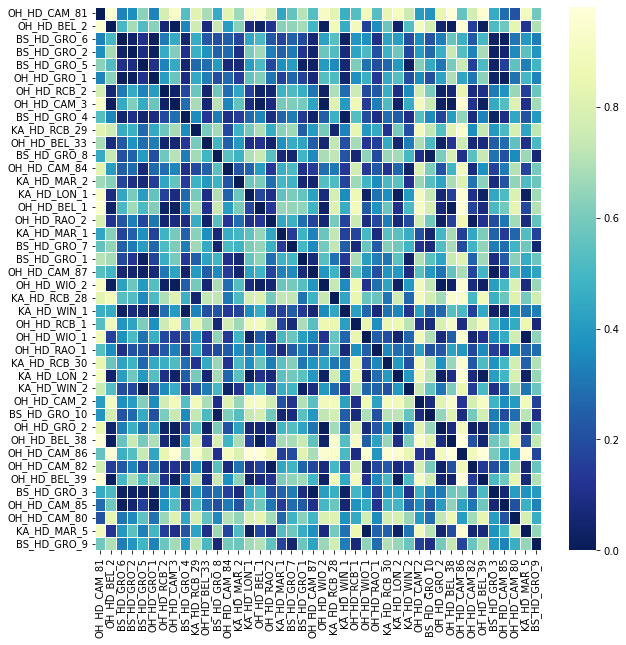

In [14]:
# plot it with seaborn
plt_heatmap(df_dist_pairwise)
# the darker, the similar

## Cluster based on Cosine similarity

In [15]:
# Elbows method to find optimal clusters
def find_n_cluster_by_elbow(df_dist_pairwise):
    cs = []
    plt.figure(figsize=(10,6))
    for i in range(1, 20):
        kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
        kmeans.fit(df_dist_pairwise)
        cs.append(kmeans.inertia_)
    plt.plot(range(1, 20), cs)
    plt.title('The Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('CS')
    plt.show()

# it seems that 3 ~ 5 cluster are reasonable

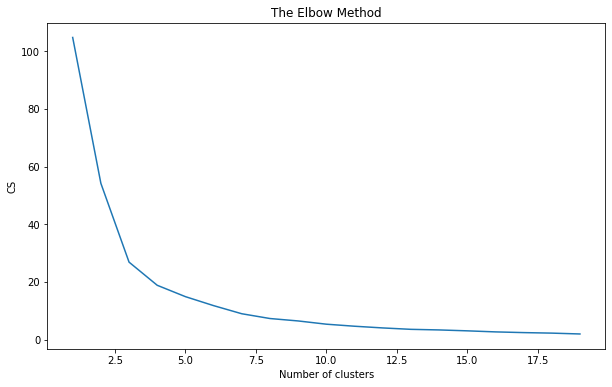

In [16]:
find_n_cluster_by_elbow(df_dist_pairwise)

### Kmeans cluster based on cosine similarity

In [223]:
def transform_by_PCA_plot(data, name):
    # transform the data to 2d to plot
    pca = PCA(2)

    #Transform the data
    transform = pca.fit_transform(data)

    #Initialize the class object
    kmeans = KMeans(n_clusters= 3)
    
    #predict the labels of clusters.
    label = kmeans.fit_predict(transform)
    
    #Getting unique labels
    u_labels = np.unique(label)
    print(label)
    print(u_labels)
    print("len(label): ", len(label))

    #plotting the results:
    plt.figure(figsize=(10,6))
    for i in u_labels:
        plt.scatter(transform[label == i , 0] , transform[label == i , 1] , label = i)
    plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='purple',marker='+',label='centroid')
    plt.legend()
    # plt.savefig(name + '_cluster.png')
    plt.show()
    return label

## Note: pay more attendtion to the cluster itself, the number may change
## treat the left part as cluster 0, middle part as cluster 1, and right part as cluster 2, and check if the cluster make sense to you.

array([2, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 2, 1, 1, 0, 0, 0, 2, 2, 1, 1, 0,
       1, 1, 2, 0, 1, 1, 0, 1, 2, 2, 0, 0, 2, 0, 0, 1, 1, 2, 0, 2],
      dtype=int32)

array([0, 1, 2], dtype=int32)

len(label):  42


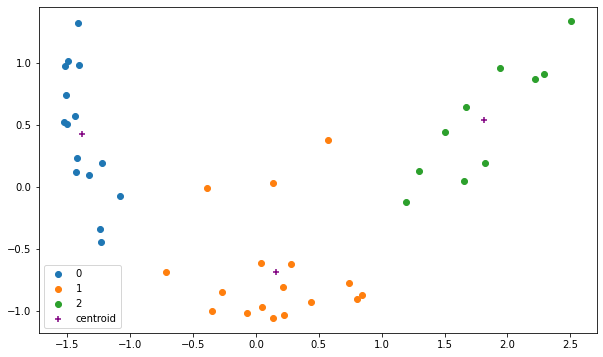

In [225]:
label = transform_by_PCA_plot(df_dist_pairwise, 'cos')
# the number may change but the cluster does not change

### Save the results from cos cluster

In [114]:
df_final = pd.DataFrame()
df_final.index = data_df_transposed.index

In [115]:
df_final['cos_cluster'] = label

In [116]:
df_final.head()

,cos_cluster
OH_HD_CAM_81,2
OH_HD_BEL_2,0
BS_HD_GRO_6,1
BS_HD_GRO_2,1
BS_HD_GRO_5,1


# Cluster by Jensen-Shannon Divergence

In [44]:
# same logic, but use Jensen-Shannon Divergence instead of cosine similarity
# calculate pairwise Jensen-Shannon Divergence
df_dist_pairwise_js = pd.DataFrame(
    squareform(pdist(data_df_transposed, metric='jensenshannon')),
    columns = data_df_transposed.index,
    index = data_df_transposed.index
)

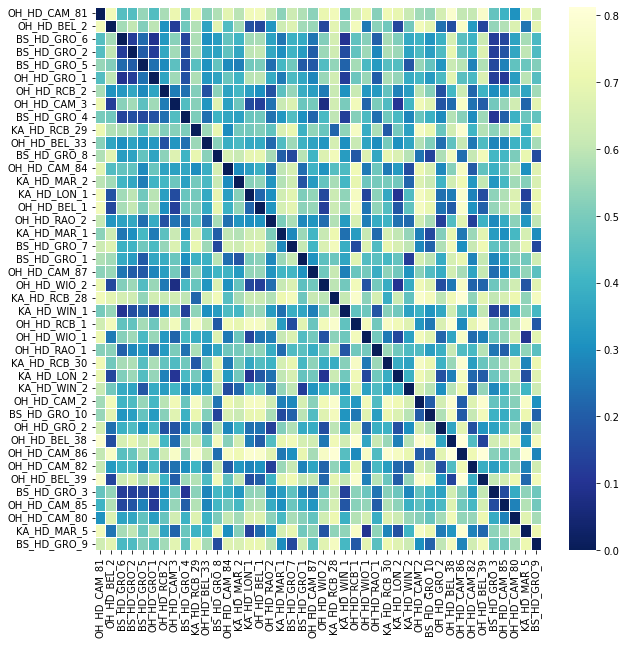

In [45]:
plt_heatmap(df_dist_pairwise_js)

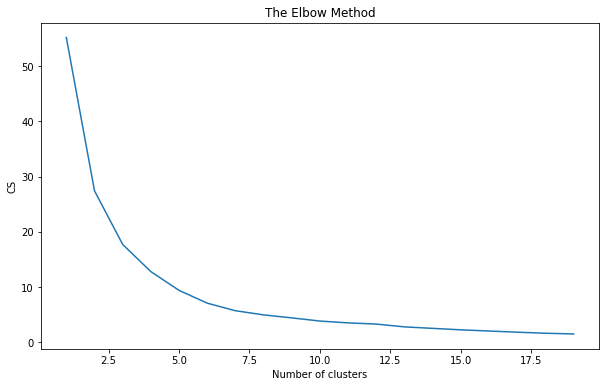

In [48]:
find_n_cluster_by_elbow(df_dist_pairwise_js)

array([2, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 2, 0, 1, 0, 0, 0, 2, 2, 1, 1, 0,
       0, 1, 2, 0, 1, 0, 0, 1, 2, 2, 0, 0, 2, 0, 0, 1, 1, 2, 0, 2],
      dtype=int32)

array([0, 1, 2], dtype=int32)

len(label):  42


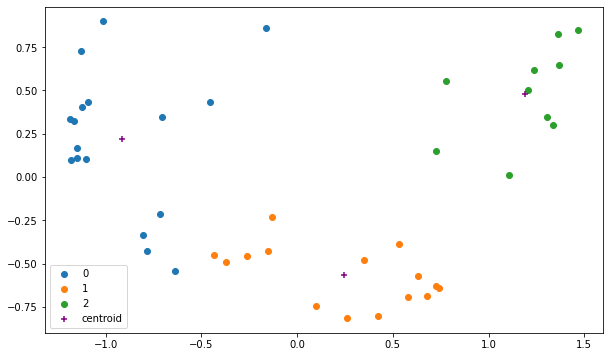

In [118]:
label = transform_by_PCA_plot(df_dist_pairwise_js, 'js')

### Save the results from Jensen-Shannon Divergence cluster

In [119]:
df_final['js_cluster'] = label

In [120]:
df_final.head()

,cos_cluster,js_cluster
OH_HD_CAM_81,2,2
OH_HD_BEL_2,0,0
BS_HD_GRO_6,1,1
BS_HD_GRO_2,1,1
BS_HD_GRO_5,1,1


## Cluster by wasserstein distance

In [121]:
# wasserstein distance
# use deepcopy!!!
df_dist_pairwise_wd = df_dist_pairwise.copy(deep = True)

In [122]:
from scipy.stats import wasserstein_distance
for mycol1 in data_df.columns:
    for mycol2 in data_df.columns:
        df_dist_pairwise_wd.loc[mycol1,mycol2] = wasserstein_distance(data_df[mycol1], data_df[mycol2])

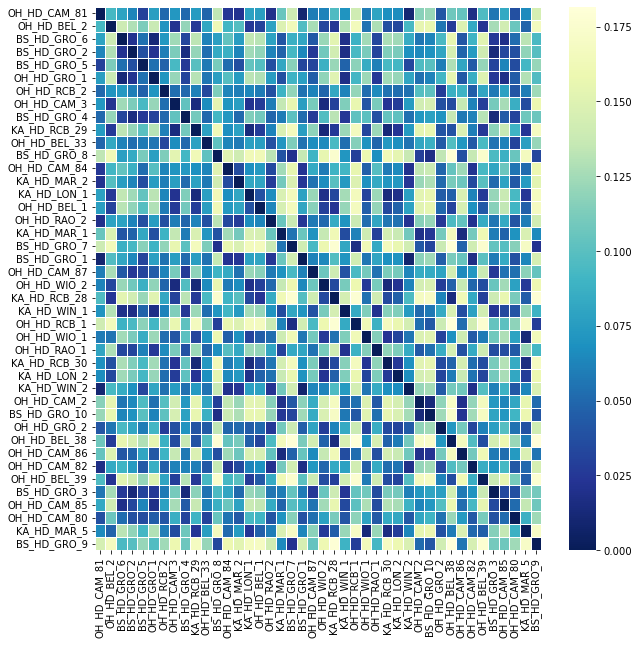

In [123]:
plt_heatmap(df_dist_pairwise_wd)

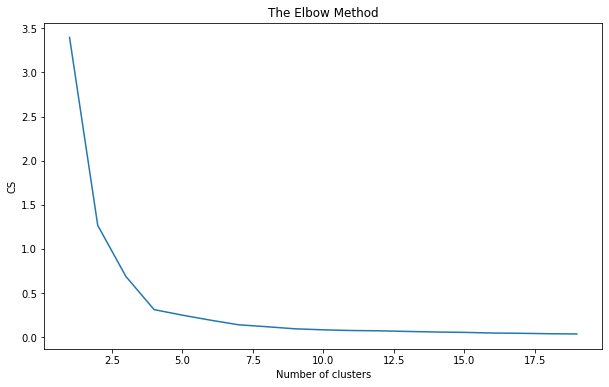

In [124]:
find_n_cluster_by_elbow(df_dist_pairwise_wd)
# 3 cluster seems to be the best!

array([2, 0, 1, 1, 2, 1, 2, 0, 2, 0, 2, 1, 2, 2, 0, 0, 2, 1, 1, 2, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 2, 1, 1, 2, 0, 1, 2, 0, 1, 1, 2, 0, 1],
      dtype=int32)

array([0, 1, 2], dtype=int32)

len(label):  42


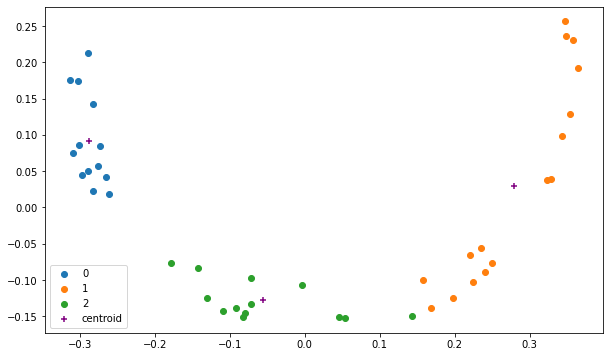

In [213]:
label = transform_by_PCA_plot(df_dist_pairwise_wd, 'wd')

### Save the results from wasserstein distance

In [214]:
df_final['wb_cluster'] = label

In [217]:
# do not care too much about the cluster number (0,1,2)
# pay more attendtion to the cluster itself!
df_final.to_csv('./cluster_res.csv')